#**Before Start**

In [1]:
!pip install --upgrade tqdm

     |████████████████████████████████| 71kB 2.0MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [2]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

     |████████████████████████████████| 378kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 516.2MB 26kB/s 
     |████████████████████████████████| 3.0MB 37.9MB/s 
     |████████████████████████████████| 460kB 45.9MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [4]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 180215731935086488, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2211572986561212776
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17272405395674758339
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15788201792
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17651832807286161712
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [7]:
!cat /proc/meminfo

MemTotal:       26751688 kB
MemFree:        14780556 kB
MemAvailable:   25512436 kB
Buffers:          159196 kB
Cached:         10489544 kB
SwapCached:            0 kB
Active:          1009660 kB
Inactive:       10209064 kB
Active(anon):     459892 kB
Inactive(anon):     8588 kB
Active(file):     549768 kB
Inactive(file): 10200476 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:            107524 kB
Writeback:           104 kB
AnonPages:        570276 kB
Mapped:           448864 kB
Shmem:              9164 kB
Slab:             465752 kB
SReclaimable:     398656 kB
SUnreclaim:        67096 kB
KernelStack:        4544 kB
PageTables:         6756 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13375844 kB
Committed_AS:    3007172 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             1904 kB
AnonHugePages:   

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/3-class.csv 3-class.csv

In [10]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/stop_words.txt stop_words.txt

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlinBackend.figure_format = 'retina'
df = pd.read_csv('3-class.csv')
df.head(10)

,Tweet,Polarity
0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...,neg
1,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...,neg
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...,neg
3,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...,neg
4,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...,neg
5,الاعلام اللبناني يهاجم السعوديه منذ مده بكل ق...,neg
6,البرنامج استاجر بعض المشاهير و الهوامير في تو...,neg
7,الحمد لله ما احتاج اتعلم من واحد فاشل اخلاقيا...,neg
8,الخرج بيض الله وجه محافظ الخرج فهذه القناه تص...,neg
9,الرياض السعوديه رسالتي لوزير العمل في حينه عن...,neg


In [70]:
#Discovering dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56674 entries, 0 to 56673
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     56674 non-null  object
 1   Polarity  56674 non-null  object
dtypes: object(2)
memory usage: 885.7+ KB


In [71]:
#Discovering dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56674 entries, 0 to 56673
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     56674 non-null  object
 1   Polarity  56674 non-null  object
dtypes: object(2)
memory usage: 885.7+ KB


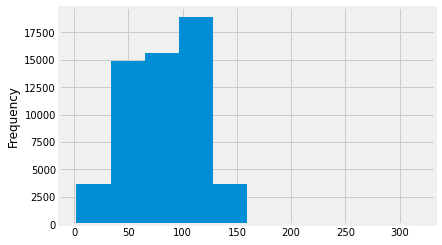

In [72]:
#Discovering the tweets length
df['Tweet'].str.len().plot.hist()

In [73]:
#Discovering the count of each class
df.Polarity.value_counts()

neg     20731
neut    18726
pos     17217
Name: Polarity, dtype: int64

In [74]:
#Change class values from neg pos neut to 0 1 2
df['Polarity'] = df['Polarity'].map({'neg': 0, 'pos': 1, 'neut': 2})

In [75]:
df[df.Polarity == 0].head(10)

,Tweet,Polarity
0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...,0
1,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...,0
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...,0
3,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...,0
4,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...,0
5,الاعلام اللبناني يهاجم السعوديه منذ مده بكل ق...,0
6,البرنامج استاجر بعض المشاهير و الهوامير في تو...,0
7,الحمد لله ما احتاج اتعلم من واحد فاشل اخلاقيا...,0
8,الخرج بيض الله وجه محافظ الخرج فهذه القناه تص...,0
9,الرياض السعوديه رسالتي لوزير العمل في حينه عن...,0


In [76]:
df['Tweet'].nunique()

55176

In [77]:
repeat=[]
list_of_tweets = df['Tweet'].to_list()
for i in range(len(list_of_tweets)-1):
  if list_of_tweets[i] in list_of_tweets[i+1:]:
    repeat.append(i)
len(repeat)

1498

In [78]:
df.drop(repeat,axis=0,inplace=True)
len(df)

55176

In [79]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     55176 non-null  object
 1   Polarity  55176 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.2+ KB


In [80]:
df.Polarity.value_counts()

0    19944
2    18285
1    16947
Name: Polarity, dtype: int64

In [81]:
x = df.Tweet
y = df.Polarity

#**Preprocessing**

In [82]:
# Data cleaning function definition

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [83]:
import re
from bs4 import BeautifulSoup

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
arabic_num_pat = '[٠١٢٣٤٥٦٧٨٩]'
eng_num_pat = '[0123456789]'
sharta_pat = '[_]'
#sharta_pat = '_[أ-ي]+' #for removing hashtag
eng_pat = '[A-Za-z]'

def tweet_cleaner(text):
  soup = BeautifulSoup(text, 'lxml')
  souped = soup.get_text()
  try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
  except:
        bom_removed = souped
  stripped = re.sub(combined_pat, '', bom_removed)
  stripped = re.sub(www_pat, '', stripped)
  stripped = re.sub(arabic_num_pat, '', stripped)
  stripped = re.sub(eng_num_pat, '', stripped)
  #stripped = re.sub(r'\w+_\s?','_',stripped) #for removing hashtag
  stripped = re.sub(sharta_pat, ' ', stripped)
  stripped = re.sub(eng_pat, ' ', stripped)

  words = [x for x in tok.tokenize(stripped) if len(x) > 1]
  return (" ".join(words)).strip()

##**remove SW/hashtag only**

In [84]:
#stopword function
import codecs

def get_stop_words():
    path = 'stop_words.txt'
    stop_words = []
    with codecs.open(path, "r", encoding="utf-8", errors="ignore") as myfile:
        stop_words = myfile.readlines()
    stop_words = [word.strip() for word in stop_words]
    return stop_words

stop_words = get_stop_words()

def remove_stop_words(strList):
  resList = []
  for i in range(0, len(strList)):
    if(strList[i] not in stop_words):
      resList.append(strList[i])
  return ' '.join(resList)

In [85]:
clean_tweet_texts = []
for i in range(0, len(df)):
  if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed"%(i+1,len(df)))                                                                    
  #clean_tweet_texts.append(remove_stop_words(tweet_cleaner(df['Tweet'][i]).split(' ')))
  clean_tweet_texts.append(tweet_cleaner(df['Tweet'][i])) #for removing hashtag only

Tweets 10000 of 55176 has been processed
Tweets 20000 of 55176 has been processed
Tweets 30000 of 55176 has been processed
Tweets 40000 of 55176 has been processed
Tweets 50000 of 55176 has been processed


In [86]:
clean_tweet_texts[:10]

['الوسخ ابن الوسخه كلما حصل حادث اتهم السعوديه بالارهاب الكلب كان براتب مليون جنيه من سنوي مصر',
 'اخطر حروب الارض حرب العقيده حسيبك الله اول ال راه يم رب عل نا وق ده الع يده وات زا',
 'اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال خبثها اين مسؤولي الجمعيه من هذا',
 'اعلامنا متمثل في داوودالشريان روتانا وطقتهم كيف ترجي من هالاشكال خير همهم الوحيد في الحياه',
 'الاصرار بضاعه هالمترديه قناه العهر مزجاه في جميع المجالات',
 'الاعلام اللبناني يهاجم السعوديه منذ مده بكل قبيح ومجموعه تدعم الاعلام في لبنان باقامه برامجها الضخمه فيها',
 'البرنامج استاجر بعض المشاهير الهوامير في تويتر عشان يبررو لهم ويرقعو لقناه',
 'الحمد لله ما احتاج اتعلم من واحد فاشل اخلاقيا همه الشحاذه من على حساب',
 'الخرج بيض الله وجه محافظ الخرج فهذه القناه تصب على المسلمين سيل من المخالفات الشرعيه والمحرمات تدعو الى الرذيله وتشوه صوره الاسلام',
 'الرياض السعوديه رسالتي لوزير العمل في حينه عن برنامج حتي بفكرته منسوخ بشكل مبتذل وفاشل']

In [87]:
clean_tweet_texts[:10]

['الوسخ ابن الوسخه كلما حصل حادث اتهم السعوديه بالارهاب الكلب كان براتب مليون جنيه من سنوي مصر',
 'اخطر حروب الارض حرب العقيده حسيبك الله اول ال راه يم رب عل نا وق ده الع يده وات زا',
 'اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال خبثها اين مسؤولي الجمعيه من هذا',
 'اعلامنا متمثل في داوودالشريان روتانا وطقتهم كيف ترجي من هالاشكال خير همهم الوحيد في الحياه',
 'الاصرار بضاعه هالمترديه قناه العهر مزجاه في جميع المجالات',
 'الاعلام اللبناني يهاجم السعوديه منذ مده بكل قبيح ومجموعه تدعم الاعلام في لبنان باقامه برامجها الضخمه فيها',
 'البرنامج استاجر بعض المشاهير الهوامير في تويتر عشان يبررو لهم ويرقعو لقناه',
 'الحمد لله ما احتاج اتعلم من واحد فاشل اخلاقيا همه الشحاذه من على حساب',
 'الخرج بيض الله وجه محافظ الخرج فهذه القناه تصب على المسلمين سيل من المخالفات الشرعيه والمحرمات تدعو الى الرذيله وتشوه صوره الاسلام',
 'الرياض السعوديه رسالتي لوزير العمل في حينه عن برنامج حتي بفكرته منسوخ بشكل مبتذل وفاشل']

In [88]:
#normalization
def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    return(text)
for i in range(len(clean_tweet_texts)):
  clean_tweet_texts[i] = normalizeArabic(clean_tweet_texts[i])
#repeated letters
import re
for i in range(len(clean_tweet_texts)):
  clean_tweet_texts[i] = re.sub(r'(.)\1+', r'\1\1', clean_tweet_texts[i])

In [89]:
clean_tweet_texts[:10]

['الوسخ ابن الوسخه كلما حصل حادث اتهم السعوديه بالارهاب الكلب كان براتب مليون جنيه من سنوي مصر',
 'اخطر حروب الارض حرب العقيده حسيبك الله اول ال راه يم رب عل نا وق ده الع يده وات زا',
 'اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال خبثها اين مسوولي الجمعيه من هذا',
 'اعلامنا متمثل في داوودالشريان روتانا وطقتهم كيف ترجي من هالاشكال خير همهم الوحيد في الحياه',
 'الاصرار بضاعه هالمترديه قناه العهر مزجاه في جميع المجالات',
 'الاعلام اللبناني يهاجم السعوديه منذ مده بكل قبيح ومجموعه تدعم الاعلام في لبنان باقامه برامجها الضخمه فيها',
 'البرنامج استاجر بعض المشاهير الهوامير في تويتر عشان يبررو لهم ويرقعو لقناه',
 'الحمد لله ما احتاج اتعلم من واحد فاشل اخلاقيا همه الشحاذه من علي حساب',
 'الخرج بيض الله وجه محافظ الخرج فهذه القناه تصب علي المسلمين سيل من المخالفات الشرعيه والمحرمات تدعو الي الرذيله وتشوه صوره الاسلام',
 'الرياض السعوديه رسالتي لوزير العمل في حينه عن برنامج حتي بفكرته منسوخ بشكل مبتذل وفاشل']

In [90]:
df = pd.DataFrame(clean_tweet_texts, columns=['text'])
df['polarity'] = y
df.rename(columns={'polarity':'target'},inplace=True)
df.to_csv('clean_tweet.csv', encoding='utf-8')

In [91]:
csv = 'clean_tweet.csv'
df = pd.read_csv(csv, index_col=0)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55176 entries, 0 to 55175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    55171 non-null  object
 1   target  55176 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [93]:
df.head()

,text,target
0,الوسخ ابن الوسخه كلما حصل حادث اتهم السعوديه ب...,0
1,اخطر حروب الارض حرب العقيده حسيبك الله اول ال ...,0
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال خ...,0
3,اعلامنا متمثل في داوودالشريان روتانا وطقتهم كي...,0
4,الاصرار بضاعه هالمترديه قناه العهر مزجاه في جم...,0


In [94]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55171 entries, 0 to 55170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    55171 non-null  object
 1   target  55171 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.2+ KB


In [95]:
x = df.text
y = df.target


In [96]:
from sklearn.model_selection import train_test_split
SEED = 666
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [97]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive, {3:.2f}% neutral".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 2]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive, {3:.2f}% neutral".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 2]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive, {3:.2f}% neutral".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 2]) / (len(x_test)*1.))*100))


Train set has total 44136 entries with 36.17% negative, 30.75% positive, 33.09% neutral
Validation set has total 5517 entries with 36.47% negative, 30.56% positive, 32.97% neutral
Test set has total 5518 entries with 35.67% negative, 30.61% positive, 33.73% neutral


In [98]:
#converting the labels to categorical data

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(44136, 3)

In [99]:
y_validation = to_categorical(y_validation)

In [100]:
y_validation.shape

(5517, 3)

#**word to vector**

In [101]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils
from keras.preprocessing.text import Tokenizer

##**AraVec**

In [102]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/full_uni_cbow_100_twitter.zip /content/

In [103]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/full_uni_sg_100_twitter.zip /content/

In [104]:
!unzip full_uni_cbow_100_twitter.zip

Archive:  full_uni_cbow_100_twitter.zip
replace full_uni_cbow_100_twitter.mdl? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace full_uni_cbow_100_twitter.mdl.trainables.syn1neg.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace full_uni_cbow_100_twitter.mdl.wv.vectors.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [105]:
!unzip full_uni_sg_100_twitter.zip

Archive:  full_uni_sg_100_twitter.zip
replace full_uni_sg_100_twitter.mdl? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace full_uni_sg_100_twitter.mdl.trainables.syn1neg.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace full_uni_sg_100_twitter.mdl.wv.vectors.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [106]:
from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('full_uni_cbow_100_twitter.mdl')
model_ug_sg = KeyedVectors.load('full_uni_cbow_100_twitter.mdl')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [107]:
len(model_ug_cbow.wv.vocab.keys())

1259756

In [108]:
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
  embeddings_index[w] = np.append(model_ug_cbow.wv[w], 
                                  model_ug_sg.wv[w])
print(f'Found {len(embeddings_index)} word vectors.')

Found 1259756 word vectors.


#**Pad Sequence**

In [109]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [110]:
len(tokenizer.word_index)

72870

In [111]:
for x in x_train[:5]:
  print(x)

افا شالوا عزام
اجازه للرياض غدا انتظروا الرسمي
بينوعون مصادر الدخل ورفع الانفاق علي حساب عشره البنزين اقص يدي من الذراع اذا تعرضوا لمخصصات الامراا
اليمن الجاليه اليمنيه في اميركا عوده هادي لعدن خطوه اولي للوصول الي صنعاا
اي ظلم هذا وضيم وقهر يا الخنفوش يارب انزل في مقتك وغضبك اسيويا وارنا بلجنه التحكيم عجاءب قدرتك وغضبك وقوتك


In [112]:
length = []
for x in x_train:
  length.append(len(x.split()))

In [113]:
tweetlen= max(length)
tweetlen

28

In [114]:
x_train_seq = pad_sequences(sequences, maxlen=tweetlen)
print('Shape of data tensor: ', x_train_seq.shape)

Shape of data tensor:  (44136, 28)


In [115]:
x_train_seq[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,  7216, 12608,
          188],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,   101,  3861,   169,  4116,
         1905],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0, 30825,  1027,  1082,  2291,  2367,     4,   464,
         2101,   137, 10633,  6510,     1, 30826,    38, 30827, 20507,
         3862],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,    31,  7217,  2655,
            3, 12609,   166,  2102, 15553,  1458,  1800, 10634,    16,
          615],
       [    0,     0,     0,     0,     0,     0,     0,     0,    56,
          277

In [116]:
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen=tweetlen)

In [117]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 200)) #AraVec
#embedding_matrix = np.zeros((num_words, 300)) #ArabicNews & Fasttext

for word, i in tokenizer.word_index.items():
  if i >= num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [118]:
seed = 3

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.embeddings import Embedding

In [119]:
sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=tweetlen)
y_test = to_categorical(y_test)

In [120]:
!pip install keras_metrics

In [121]:
import keras
import keras_metrics
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import shutil

#**GRU with stopword removal**

In [64]:
tensorboard = TensorBoard(log_dir="./logs/gru_remove_stopword")
keras_callbacks = [tensorboard]

In [65]:
%%time

model_gru = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_gru.add(e)
model_gru.add(keras.layers.GRU(100, dropout=0.2))
model_gru.add(Dense(3, activation='softmax'))
#optimizers=Adam(lr=0.001,momentum=0.9, clipnorm=1.0)
model_gru.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model_gru.summary()
model_gru.fit(x_train_seq, y_train, 
          validation_data=(x_val_seq, y_validation),
          epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 24, 200)           20000000  
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               90300     
_________________________________________________________________
dense_1 (Dense)              (

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44134 samples, validate on 5517 samples
Epoch 1/5
44134/44134 [==============================] - 68s 2ms/step - loss: 0.6746 - accuracy: 0.7158 - precision: 0.6899 - recall: 0.6072 - f1_score: 0.6451 - val_loss: 0.5729 - val_accuracy: 0.7658 - val_precision: 0.7930 - val_recall: 0.7449 - val_f1_score: 0.7680
Epoch 2/5
44134/44134 [==============================] - 67s 2ms/step - loss: 0.5123 - accuracy: 0.7910 - precision: 0.8121 - recall: 0.7749 - f1_score: 0.7930 - val_loss: 0.5245 - val_accuracy: 0.7850 - val_precision: 0.8255 - val_recall: 0.7572 - val_f1_score: 0.7897
Epoch 3/5
44134/44134 [==============================] - 66s 1ms/step - loss: 0.4305 - accuracy: 0.8298 - precision: 0.8502 - recall: 0.8192 - f1_score: 0.8344 - val_loss: 0.5230 - val_accuracy: 0.7874 - val_precision: 0.8192 - val_recall: 0.7517 - val_f1_score: 0.7838
Epoch 4/5
44134/44134 [==============================] - 66s 1ms/step - loss: 0.3557 - accuracy: 0.8633 - precision: 0.8847 - recall: 0.8574 

In [66]:
#stopword removal
model_gru.evaluate(x_test_seq, y_test)

5517/5517 [==============================] - 2s 353us/step


[0.5743116761152783,
 0.7853906154632568,
 0.8411598801612854,
 0.7532173991203308,
 0.7946584224700928]

In [67]:
# serialize model to JSON
model_json = model_gru.to_json()
with open("/content/drive/My Drive/3-class/gru_remove_stopword/model_gru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_gru.save_weights("/content/drive/My Drive/3-class/gru_remove_stopword/model_gru.h5")
print("Saved model to disk")

Saved model to disk


In [68]:
shutil.move('/content/logs/gru_remove_stopword','/content/drive/My Drive/3-class/gru_remove_stopword/model_gru')

'/content/drive/My Drive/3-class/gru_remove_stopword/model_gru'

#**GRU with hashtag removal**

In [122]:
tensorboard = TensorBoard(log_dir="./logs/gru_remove_hashtag")
keras_callbacks = [tensorboard]

In [123]:
%%time

model_gru = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_gru.add(e)
model_gru.add(keras.layers.GRU(100, dropout=0.2))
model_gru.add(Dense(3, activation='softmax'))
#optimizers=Adam(lr=0.001,momentum=0.9, clipnorm=1.0)
model_gru.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
model_gru.summary()
model_gru.fit(x_train_seq, y_train, 
          validation_data=(x_val_seq, y_validation),
          epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               90300     
_________________________________________________________________
dense_2 (Dense)              (

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44136 samples, validate on 5517 samples
Epoch 1/5
  256/44136 [..............................] - ETA: 3:37 - loss: 1.1941 - accuracy: 0.3984 - precision: 0.4824 - recall: 0.2338 - f1_score: 0.3130

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.194794). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


44136/44136 [==============================] - 77s 2ms/step - loss: 0.6988 - accuracy: 0.6990 - precision: 0.6624 - recall: 0.5578 - f1_score: 0.6046 - val_loss: 0.5962 - val_accuracy: 0.7528 - val_precision: 0.7662 - val_recall: 0.7640 - val_f1_score: 0.7647
Epoch 2/5
44136/44136 [==============================] - 75s 2ms/step - loss: 0.5332 - accuracy: 0.7827 - precision: 0.8008 - recall: 0.7601 - f1_score: 0.7799 - val_loss: 0.5630 - val_accuracy: 0.7714 - val_precision: 0.8459 - val_recall: 0.7018 - val_f1_score: 0.7668
Epoch 3/5
44136/44136 [==============================] - 75s 2ms/step - loss: 0.4526 - accuracy: 0.8196 - precision: 0.8384 - recall: 0.8089 - f1_score: 0.8234 - val_loss: 0.5719 - val_accuracy: 0.7705 - val_precision: 0.8629 - val_recall: 0.6733 - val_f1_score: 0.7559
Epoch 4/5
44136/44136 [==============================] - 75s 2ms/step - loss: 0.3772 - accuracy: 0.8524 - precision: 0.8763 - recall: 0.8506 - f1_score: 0.8632 - val_loss: 0.5810 - val_accuracy: 0.775

In [124]:
#hashtag removal
model_gru.evaluate(x_test_seq, y_test)

5518/5518 [==============================] - 2s 393us/step


[0.5983511477806033,
 0.7707502841949463,
 0.8141692876815796,
 0.7158165574073792,
 0.7615773677825928]

In [125]:
# serialize model to JSON
model_json = model_gru.to_json()
with open("/content/drive/My Drive/3-class/gru_remove_hashtag/model_gru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_gru.save_weights("/content/drive/My Drive/3-class/gru_remove_hashtag/model_gru.h5")
print("Saved model to disk")

Saved model to disk


In [126]:
shutil.move('/content/logs/gru_remove_hashtag','/content/drive/My Drive/3-class/gru_remove_hashtag/model_gru')

'/content/drive/My Drive/3-class/gru_remove_hashtag/model_gru'